In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "c/content/drive/MyDrive/AAI-530 Final Project Data"

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
1.2&nbsp;&nbsp;Overview of Available Sensor Files
</div>

In [3]:

DATA_PATH = "/content/drive/MyDrive/AAI-530 Final Project Data" # Corrected path
files = sorted(os.listdir(DATA_PATH))
files

['.ipynb_checkpoints',
 'CE.txt',
 'CP.txt',
 'EPS1.txt',
 'FS1.txt',
 'FS2.txt',
 'PS1.txt',
 'PS2.txt',
 'PS3.txt',
 'PS4.txt',
 'PS5.txt',
 'PS6.txt',
 'SE.txt',
 'TS1.txt',
 'TS2.txt',
 'TS3.txt',
 'TS4.txt',
 'VS1.txt',
 'cnn_predictions_with_sample_idx.csv',
 'cnn_predictions_with_sample_idx_and_targets.csv',
 'description.txt',
 'df_all.csv',
 'df_all_with_targets_and_predictions.csv',
 'documentation.txt',
 'optuna_trials.csv',
 'profile.txt',
 'tableau_predictions_and_targets.csv']

In [4]:
sample_path= os.path.join(DATA_PATH, files[1])
df_sample = pd.read_csv(sample_path, sep="\t", header=None)
df_sample.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,31.554,30.953,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,23.995,24.328,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.711,21.564,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.687,20.703,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.887,19.919,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016


In [5]:
df_sample.shape
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2205 non-null   float64
 1   1       2205 non-null   float64
 2   2       2205 non-null   float64
 3   3       2205 non-null   float64
 4   4       2205 non-null   float64
 5   5       2205 non-null   float64
 6   6       2205 non-null   float64
 7   7       2205 non-null   float64
 8   8       2205 non-null   float64
 9   9       2205 non-null   float64
 10  10      2205 non-null   float64
 11  11      2205 non-null   float64
 12  12      2205 non-null   float64
 13  13      2205 non-null   float64
 14  14      2205 non-null   float64
 15  15      2205 non-null   float64
 16  16      2205 non-null   float64
 17  17      2205 non-null   float64
 18  18      2205 non-null   float64
 19  19      2205 non-null   float64
 20  20      2205 non-null   float64
 21  21      2205 non-null   float64
 22  

In [6]:

import os
import pandas as pd

SENSOR_PREFIXES = ("CE", "CP", "EPS", "FS", "PS", "SE", "TS", "VS")

sensor_files = sorted([
    f for f in os.listdir(DATA_PATH)
    if f.endswith(".txt")
    and f.startswith(SENSOR_PREFIXES)
    and os.path.isfile(os.path.join(DATA_PATH, f))
])

EXPECTED_COLS = 60

dfs = []
bad_files = []

for fname in sensor_files:
    fpath = os.path.join(DATA_PATH, fname)

    try:
        df = pd.read_csv(
            fpath,
            sep="\t",              # IMPORTANT: tab delimiter
            header=None,
            engine="python",       # more forgiving parser
            encoding="latin1"      # avoids unicode decode issues
        )
    except Exception as e:
        bad_files.append((fname, str(e)))
        continue

    # Drop completely empty columns (sometimes happen from trailing tabs)
    df = df.dropna(axis=1, how="all")

    # Force exactly 60 columns (keep first 60 if extra)
    if df.shape[1] >= EXPECTED_COLS:
        df = df.iloc[:, :EXPECTED_COLS]
    else:
        # if fewer than 60, pad with NaN (rare, but keeps shape consistent)
        for c in range(df.shape[1], EXPECTED_COLS):
            df[c] = pd.NA
        df = df.iloc[:, :EXPECTED_COLS]

    df["sensor_file"] = fname.replace(".txt", "")
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

print("Sensor files found:", sensor_files)
print("Combined shape:", df_all.shape)
print("Unique sensor files:", df_all["sensor_file"].nunique())
print("Bad files:", bad_files)

df_all.head()

Sensor files found: ['CE.txt', 'CP.txt', 'EPS1.txt', 'FS1.txt', 'FS2.txt', 'PS1.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt', 'SE.txt', 'TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt', 'VS1.txt']
Combined shape: (37485, 61)
Unique sensor files: 17
Bad files: []


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,sensor_file
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,30.953,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866,CE
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,24.328,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588,CE
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.564,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519,CE
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.703,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403,CE
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.919,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016,CE


In [7]:
print(df_all["sensor_file"].value_counts().head())
print("Any nulls?", df_all.isna().sum().sum())
print("Number of columns (should be consistent across sensors):", df_all.shape[1])

sensor_file
CE      2205
CP      2205
EPS1    2205
FS1     2205
FS2     2205
Name: count, dtype: int64
Any nulls? 0
Number of columns (should be consistent across sensors): 61


In [8]:
# 1.4.1 Standardize Column Structure and Validate Consistency

# Rename signal columns (0–59) -> t0–t59
signal_cols = list(range(60))
rename_map = {i: f"t{i}" for i in signal_cols}
df_all = df_all.rename(columns=rename_map)

# Ensure signal values are numeric
for c in [f"t{i}" for i in range(60)]:
    df_all[c] = pd.to_numeric(df_all[c], errors="coerce")

# Add sample index within each sensor file (0..2204)
df_all["sample_idx"] = df_all.groupby("sensor_file").cumcount()

# Reorder columns cleanly
df_all = df_all[[f"t{i}" for i in range(60)] + ["sensor_file", "sample_idx"]]

# Sanity checks
print("Combined shape:", df_all.shape)  # should be (37485, 62)
print("Any NaNs:", int(df_all.isna().sum().sum()))
print("Rows per sensor:")
print(df_all["sensor_file"].value_counts().sort_index())

df_all.head()

Combined shape: (37485, 62)
Any NaNs: 0
Rows per sensor:
sensor_file
CE      2205
CP      2205
EPS1    2205
FS1     2205
FS2     2205
PS1     2205
PS2     2205
PS3     2205
PS4     2205
PS5     2205
PS6     2205
SE      2205
TS1     2205
TS2     2205
TS3     2205
TS4     2205
VS1     2205
Name: count, dtype: int64


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t52,t53,t54,t55,t56,t57,t58,t59,sensor_file,sample_idx
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866,CE,0
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588,CE,1
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519,CE,2
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403,CE,3
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016,CE,4


In [9]:
# 1.4.2 Finalize DataFrame Schema (column order + validation)

# Put columns in a consistent, readable order
signal_cols = [f"t{i}" for i in range(60)]
meta_cols = ["sensor_file", "sample_idx"]

# (Optional) If sample_idx doesn't exist yet, create it per sensor
if "sample_idx" not in df_all.columns:
    df_all["sample_idx"] = df_all.groupby("sensor_file").cumcount()

# Reorder columns
df_all = df_all[signal_cols + meta_cols]

# Hard validations (these should all pass)
assert df_all.shape[1] == 62, f"Expected 62 columns (60 signals + sensor_file + sample_idx), got {df_all.shape[1]}"
assert df_all[signal_cols].select_dtypes(exclude="number").shape[1] == 0, "Signal columns must all be numeric"
assert df_all[signal_cols].isna().sum().sum() == 0, "No NaNs expected in signal columns"
assert df_all["sensor_file"].nunique() == 17, f"Expected 17 sensors, got {df_all['sensor_file'].nunique()}"

print("✅ Schema finalized.")
print("Final shape:", df_all.shape)
df_all.head()

✅ Schema finalized.
Final shape: (37485, 62)


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t52,t53,t54,t55,t56,t57,t58,t59,sensor_file,sample_idx
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866,CE,0
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588,CE,1
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519,CE,2
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403,CE,3
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016,CE,4


In [11]:
dfs_by_sensor = {}
for sensor_file in df_all['sensor_file'].unique():
    dfs_by_sensor[sensor_file] = df_all[df_all['sensor_file'] == sensor_file].copy()

print(f"Created {len(dfs_by_sensor)} DataFrames, one for each unique sensor file.")
print("Keys in dfs_by_sensor dictionary:", dfs_by_sensor.keys())

# Display the head of one of the split dataframes
if 'CE' in dfs_by_sensor:
    print("\nHead of 'CE' sensor DataFrame:")
    print(dfs_by_sensor['CE'].head())

Created 17 DataFrames, one for each unique sensor file.
Keys in dfs_by_sensor dictionary: dict_keys(['CE', 'CP', 'EPS1', 'FS1', 'FS2', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'SE', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1'])

Head of 'CE' sensor DataFrame:
       t0      t1      t2      t3      t4      t5      t6      t7      t8  \
0  47.202  47.273  47.250  47.332  47.213  47.372  47.273  47.438  46.691   
1  29.208  28.822  28.805  28.922  28.591  28.643  28.216  27.812  27.514   
2  23.554  23.521  23.527  23.008  23.042  23.052  22.658  22.952  22.908   
3  21.540  21.419  21.565  20.857  21.052  21.039  20.926  20.912  20.989   
4  20.460  20.298  20.350  19.867  19.997  19.972  19.924  19.813  19.691   

       t9  ...     t52     t53     t54     t55     t56     t57     t58  \
0  46.599  ...  30.639  30.561  30.368  30.224  29.790  29.261  29.287   
1  27.481  ...  24.283  23.877  23.816  23.933  23.354  23.483  23.320   
2  22.359  ...  21.564  21.526  21.753  21.749  21.802  21.582  

In [12]:
target= os.path.join(DATA_PATH, 'profile.txt')
print(target)

/content/drive/MyDrive/AAI-530 Final Project Data/profile.txt


In [13]:
try:
        df_target = pd.read_csv(
            target,
            sep="\t",
            header=None,
            engine="python",
            encoding="latin1"
        )
except Exception as e:
    bad_files.append((fname, str(e)))

df_target.describe()

,0,1,2,3,4
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,41.240816,90.693878,0.669388,107.199546,0.342857
std,42.383143,10.681802,0.817233,16.435848,0.474772
min,3.000000,73.000000,0.000000,90.000000,0.000000
25%,3.000000,80.000000,0.000000,90.000000,0.000000
50%,20.000000,100.000000,0.000000,100.000000,0.000000
75%,100.000000,100.000000,1.000000,130.000000,1.000000
max,100.000000,100.000000,2.000000,130.000000,1.000000


In [23]:

# id_vars = ['sensor_file', 'sample_idx']
# signal_cols = [f"t{i}" for i in range(60)]

# # Perform the melt operation
# df_tableau = df_all.melt(
#     id_vars=id_vars,
#     value_vars=signal_cols,
#     var_name='time_moment_raw',  # Temporary column name for t0, t1, etc.
#     value_name='sensor_value'
# )

# # Extract the numeric time moment from 'time_moment_raw'
# df_tableau['time_moment'] = df_tableau['time_moment_raw'].str.replace('t', '').astype(int)

# # Drop the raw time moment column and reorder columns for clarity
# df_tableau = df_tableau[['sensor_file', 'sample_idx', 'time_moment', 'sensor_value']]

# # Prepare df_target by renaming columns for clarity before merging
# target_col_names = {i: f'target_var_{i}' for i in range(df_target.shape[1])}
# df_target_renamed = df_target.rename(columns=target_col_names)
# # Add sample_idx to df_target_renamed, assuming its index corresponds to sample_idx
# df_target_renamed['sample_idx'] = df_target_renamed.index

# # Merge df_tableau with df_target_renamed on 'sample_idx'
# # This will repeat target variables for each sensor_file as requested
# df_tableau = pd.merge(df_tableau, df_target_renamed, on='sample_idx', how='left')

# print("Transformed DataFrame for Tableau with target variables:")
# print(df_tableau.head())
# print(f"New DataFrame shape: {df_tableau.shape}")

In [15]:
signal_cols = [f"t{i}" for i in range(60)] # Define signal_cols
arrays = [df[signal_cols].values for df in dfs_by_sensor.values()]

X = np.stack(arrays, axis=-1)
y = df_target.values

print(f"Input shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")

Input shape (X): (2205, 60, 17)
Target shape (y): (2205, 5)


In [16]:
from sklearn.preprocessing import StandardScaler
X_features = X
y_target = df_target.iloc[:, 2]
original_shape = X_features.shape
X_features_reshaped = X_features.reshape(-1, original_shape[2])
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features_reshaped)
X_features = X_features_scaled.reshape(original_shape)

print(f"X_features after scaling and reshaping: {X_features.shape}")

X_features after scaling and reshaping: (2205, 60, 17)


In [17]:
from sklearn.model_selection import TimeSeriesSplit

# To get roughly 20% of the data as the test set in the last split, n_splits should be 4.
tscv = TimeSeriesSplit(n_splits=4)
train_index, test_index = list(tscv.split(X_features))[-1]

X_train, X_test = X_features[train_index], X_features[test_index]
y_train, y_test = y_target.iloc[train_index], y_target.iloc[test_index]


In [18]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

X_train_pt = torch.from_numpy(X_train).float()
X_test_pt = torch.from_numpy(X_test).float()
y_train_pt = torch.from_numpy(y_train.values).long()
y_test_pt = torch.from_numpy(y_test.values).long()

print(f"X_train_pt shape: {X_train_pt.shape}, dtype: {X_train_pt.dtype}")
print(f"X_test_pt shape: {X_test_pt.shape}, dtype: {X_test_pt.dtype}")
print(f"y_train_pt shape: {y_train_pt.shape}, dtype: {y_train_pt.dtype}")
print(f"y_test_pt shape: {y_test_pt.shape}, dtype: {y_test_pt.dtype}")

X_train_pt shape: torch.Size([1764, 60, 17]), dtype: torch.float32
X_test_pt shape: torch.Size([441, 60, 17]), dtype: torch.float32
y_train_pt shape: torch.Size([1764]), dtype: torch.int64
y_test_pt shape: torch.Size([441]), dtype: torch.int64


In [24]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 10.4 MB/s eta 0:00:00


In [25]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train_np = y_train_pt.numpy()
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_np),
    y=y_train_np
)


weights_tensor = torch.tensor(class_weights, dtype=torch.float)

In [36]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

def objective(trial):

    seq_length = X_train_pt.shape[1]
    num_features = X_train_pt.shape[2]
    num_classes = len(torch.unique(y_train_pt))
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    num_filters = trial.suggest_int('num_filters', 8, 64, step=8)
    fc_units = trial.suggest_int('fc_units', 64, 256, step=32)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])


    class TunableCNN(nn.Module):
        def __init__(self, num_features, seq_length, num_classes, num_filters, fc_units):
            super(TunableCNN, self).__init__()
            self.conv1 = nn.Conv1d(num_features, num_filters, kernel_size=3, padding=1)
            self.bn1 = nn.BatchNorm1d(num_filters)
            self.relu = nn.ReLU()
            self.pool = nn.MaxPool1d(kernel_size=2)

            flattened_size = num_filters * (seq_length // 2)

            self.fc1 = nn.Linear(flattened_size, fc_units)
            self.fc2 = nn.Linear(fc_units, num_classes)

        def forward(self, x):
            x = x.permute(0, 2, 1)

            x = self.conv1(x)
            x = self.bn1(x)
            x = self.relu(x)
            x = self.pool(x)

            x = x.view(x.size(0), -1)

            x = self.fc1(x)
            x = self.relu(x)
            x = self.fc2(x)
            return x

    model = TunableCNN(num_features, seq_length, num_classes, num_filters, fc_units)


    criterion = nn.CrossEntropyLoss(weight=weights_tensor)
    optimizer = optim.Adam(model.parameters(), lr=lr)


    train_size = int(0.8 * len(X_train_pt))
    val_size = len(X_train_pt) - train_size
    train_dataset, val_dataset = random_split(
        TensorDataset(X_train_pt, y_train_pt), [train_size, val_size]
    )

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    validation_accuracy = correct / total
    return validation_accuracy

print("Optuna objective function 'objective' updated with Batch Norm and Weighted Loss.")

Optuna objective function 'objective' updated with Batch Norm and Weighted Loss.


In [37]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Number of finished trials:", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2026-02-21 19:15:37,176] A new study created in memory with name: no-name-35305a37-eb9c-4043-9dc1-73523e72b521
[I 2026-02-21 19:15:42,196] Trial 0 finished with value: 0.9291784702549575 and parameters: {'lr': 0.00012209978607816398, 'num_filters': 64, 'fc_units': 128, 'batch_size': 32}. Best is trial 0 with value: 0.9291784702549575.
[I 2026-02-21 19:15:43,847] Trial 1 finished with value: 0.7082152974504249 and parameters: {'lr': 6.47381493570184e-05, 'num_filters': 32, 'fc_units': 160, 'batch_size': 128}. Best is trial 0 with value: 0.9291784702549575.
[I 2026-02-21 19:15:45,946] Trial 2 finished with value: 0.7620396600566572 and parameters: {'lr': 2.6334477343596337e-05, 'num_filters': 24, 'fc_units': 96, 'batch_size': 32}. Best is trial 0 with value: 0.9291784702549575.
[I 2026-02-21 19:15:49,910] Trial 3 finished with value: 0.9065155807365439 and parameters: {'lr': 0.0005057730008790253, 'num_filters': 56, 'fc_units': 256, 'batch_size': 128}. Best is trial 0 with value: 0.92

Number of finished trials: 50
Best trial:
  Value:  0.9518413597733711
  Params: 
    lr: 0.0013041687829088002
    num_filters: 48
    fc_units: 224
    batch_size: 32


In [47]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

best_hps = study.best_trial.params
lr = best_hps['lr']
num_filters = best_hps['num_filters']
fc_units = best_hps['fc_units']
batch_size = best_hps['batch_size']

seq_length = X_train_pt.shape[1]
num_features = X_train_pt.shape[2]
num_classes = len(torch.unique(y_train_pt))

class TunableCNN(nn.Module):
    def __init__(self, num_features, seq_length, num_classes, num_filters, fc_units):
        super(TunableCNN, self).__init__()
        self.conv1 = nn.Conv1d(num_features, num_filters, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(num_filters)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)

        flattened_size = num_filters * (seq_length // 2)

        self.fc1 = nn.Linear(flattened_size, fc_units)
        self.fc2 = nn.Linear(fc_units, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

final_model = TunableCNN(num_features, seq_length, num_classes, num_filters, fc_units)

criterion = nn.CrossEntropyLoss(weight=weights_tensor)
optimizer = optim.Adam(final_model.parameters(), lr=lr)

train_dataset_final = TensorDataset(X_train_pt, y_train_pt)
train_loader_final = DataLoader(train_dataset_final, batch_size=batch_size, shuffle=True)

num_epochs_final = 20
print(f"Training final model for {num_epochs_final} epochs...")

for epoch in range(num_epochs_final):
    final_model.train()
    running_loss = 0.0
    for data, target in train_loader_final:
        optimizer.zero_grad()
        outputs = final_model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 5 == 0:
        avg_loss = running_loss / len(train_loader_final)
        print(f'Epoch [{epoch+1}/{num_epochs_final}], Average Loss: {avg_loss:.4f}')

final_model.eval()
with torch.no_grad():
    outputs_test = final_model(X_test_pt)
    test_loss = criterion(outputs_test, y_test_pt)

    _, predicted = torch.max(outputs_test.data, 1)
    total = y_test_pt.size(0)
    correct = (predicted == y_test_pt).sum().item()
    test_accuracy = correct / total

print('\n--- Final Model Evaluation ---')
print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Training final model for 20 epochs...
Epoch [5/20], Average Loss: 0.3137
Epoch [10/20], Average Loss: 0.3111
Epoch [15/20], Average Loss: 0.3133
Epoch [20/20], Average Loss: 0.2257

--- Final Model Evaluation ---
Test Loss: 0.4345
Test Accuracy: 0.7211


In [22]:
#torch.save(final_model.state_dict(), 'hydraulic_leak_model.pth')

In [21]:
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# # To load it back later:
# class TunableCNN(nn.Module):
#     def __init__(self, num_features, seq_length, num_classes, num_filters, fc_units):
#         super(TunableCNN, self).__init__()
#         # Matches the architecture used in the objective function
#         self.conv1 = nn.Conv1d(num_features, num_filters, kernel_size=3, padding=1)
#         self.bn1 = nn.BatchNorm1d(num_filters)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool1d(kernel_size=2)

#         # Output length stays 60 after Conv (padding=1), then becomes 30 after Pool
#         flattened_size = num_filters * (seq_length // 2)

#         self.fc1 = nn.Linear(flattened_size, fc_units)
#         self.fc2 = nn.Linear(fc_units, num_classes)

#     def forward(self, x):
#         # Shape: [Batch, Time, Sensors] -> [Batch, Sensors, Time]
#         x = x.permute(0, 2, 1)

#         # Feature Extraction: Conv -> BN -> ReLU -> Pool
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = self.relu(x)
#         x = self.pool(x)

#         # Transition: Flatten for Linear Layers
#         x = x.view(x.size(0), -1)

#         # Classification
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# model = TunableCNN(num_features, seq_length, num_classes, num_filters, fc_units)
# model.load_state_dict(torch.load('hydraulic_leak_model (1).pth'))
# model.eval()

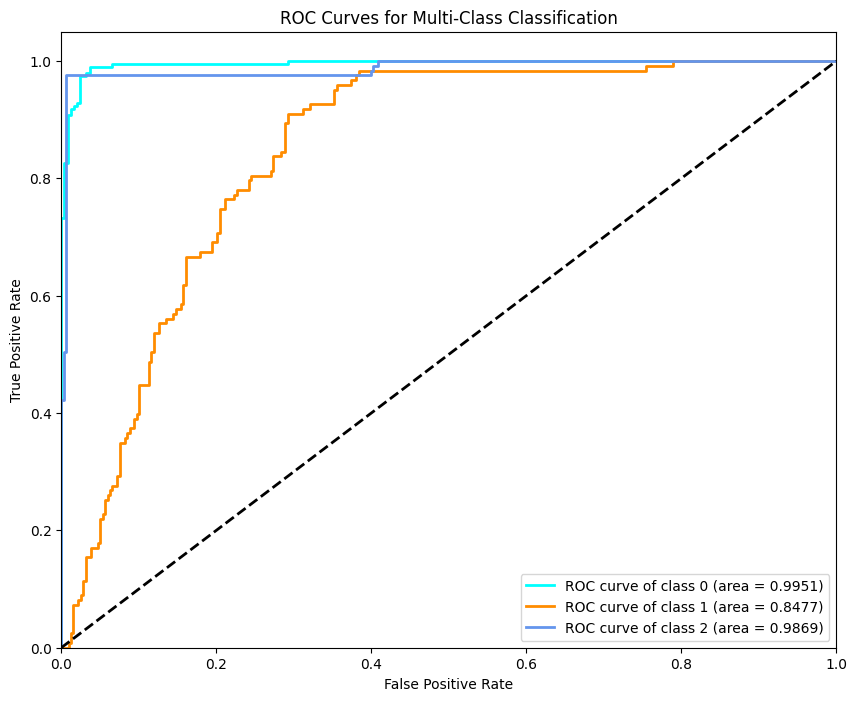

AUC scores per class:
Class 0: 0.9951
Class 1: 0.8477
Class 2: 0.9869
Micro-average AUC: 0.8850
Macro-average AUC: 0.9451


In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import torch

final_model.eval()

with torch.no_grad():
    outputs_test_logits = final_model(X_test_pt)
    y_pred_proba = torch.nn.functional.softmax(outputs_test_logits, dim=1).numpy()

y_test_np = y_test_pt.numpy()
y_test_binarized = np.eye(num_classes)[y_test_np]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

print("AUC scores per class:")
for i in range(num_classes):
    print(f"Class {i}: {roc_auc[i]:.4f}")
print(f"Micro-average AUC: {roc_auc['micro']:.4f}")
print(f"Macro-average AUC: {roc_auc['macro']:.4f}")

<Figure size 800x600 with 0 Axes>

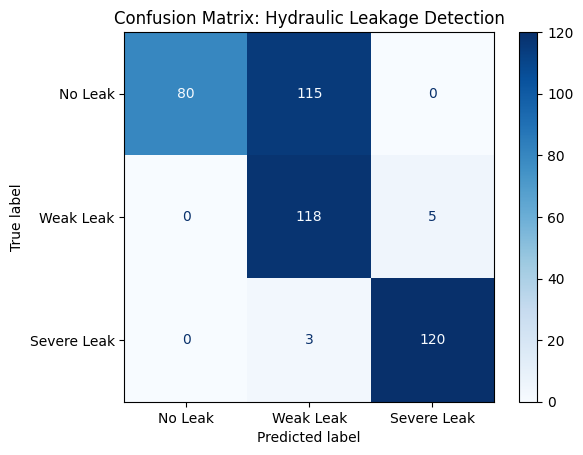

[[ 80 115   0]
 [  0 118   5]
 [  0   3 120]]


In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

final_model.eval()
#model.eval()
with torch.no_grad():
    #test_outputs= model(X_test_pt)
    test_outputs = final_model(X_test_pt)
    _, y_pred = torch.max(test_outputs, 1)

y_true = y_test_pt.numpy()
y_pred = y_pred.numpy()

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Leak', 'Weak Leak', 'Severe Leak'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix: Hydraulic Leakage Detection')
plt.show()
print(cm)

In [1]:
# # To load it back later:
# # Best trial:
# #   Value:  0.9518413597733711
# #   Params:
# #     lr: 0.0013041687829088002
# #     num_filters: 48
# #     fc_units: 224
# #     batch_size: 32
# # best_hps = study.best_trial.params
# # lr = 0.0013041687829088002
# import optuna
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset, random_split

# num_filters = 48
# fc_units = 224
# batch_size = 32
# class TunableCNN(nn.Module):
#     def __init__(self, num_features, seq_length, num_classes, num_filters, fc_units):
#         super(TunableCNN, self).__init__()
#         # Matches the architecture used in the objective function
#         self.conv1 = nn.Conv1d(num_features, num_filters, kernel_size=3, padding=1)
#         self.bn1 = nn.BatchNorm1d(num_filters)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool1d(kernel_size=2)

#         # Output length stays 60 after Conv (padding=1), then becomes 30 after Pool
#         flattened_size = num_filters * (seq_length // 2)

#         self.fc1 = nn.Linear(flattened_size, fc_units)
#         self.fc2 = nn.Linear(fc_units, num_classes)

#     def forward(self, x):
#         # Shape: [Batch, Time, Sensors] -> [Batch, Sensors, Time]
#         x = x.permute(0, 2, 1)

#         # Feature Extraction: Conv -> BN -> ReLU -> Pool
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = self.relu(x)
#         x = self.pool(x)

#         # Transition: Flatten for Linear Layers
#         x = x.view(x.size(0), -1)

#         # Classification
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x
# # Define model parameters that are derived from the data
# seq_length = X_train_pt.shape[1]  # e.g., 60
# num_features = X_train_pt.shape[2] # e.g., 17
# num_classes = len(torch.unique(y_train_pt)) # e.g., 3
# final_model = TunableCNN(num_features, seq_length, num_classes, num_filters, fc_units)
# final_model.load_state_dict(torch.load('hydraulic_leak_model (1).pth'))
# final_model.eval()

In [2]:
# Save the model weights
#torch.save(final_model.state_dict(), 'hydraulic_leak_model.pth')

In [3]:
# To load it back later:
# Best trial:
#   Value:  0.9518413597733711
#   Params:
#     lr: 0.0013041687829088002
#     num_filters: 48
#     fc_units: 224
#     batch_size: 32
# best_hps = study.best_trial.params
# lr = 0.0013041687829088002
# num_filters = 48
# fc_units = 224
# batch_size = 32

# # Define model parameters that are derived from the data
# seq_length = X_train_pt.shape[1]  # e.g., 60
# num_features = X_train_pt.shape[2] # e.g., 17
# num_classes = len(torch.unique(y_train_pt)) # e.g., 3
# model = TunableCNN(num_features, seq_length, num_classes, num_filters, fc_units)
# model.load_state_dict(torch.load('hydraulic_leak_model.pth'))
# model.eval()

In [4]:
# def predict_leakage(sensor_data_window, model):
#     """
#     sensor_data_window: A numpy array or tensor of shape [60, num_features]
#     model: Your trained final_model
#     """
#     model.eval()
#     with torch.no_grad():
#         # 1. Convert to tensor if it's numpy
#         if isinstance(sensor_data_window, np.ndarray):
#             input_tensor = torch.tensor(sensor_data_window, dtype=torch.float32)
#         else:
#             input_tensor = sensor_data_window

#         # 2. Add batch dimension: [1, 60, 17]
#         input_tensor = input_tensor.unsqueeze(0)

#         # 3. Get raw logits and convert to probabilities
#         logits = model(input_tensor)
#         probs = torch.nn.functional.softmax(logits, dim=1)

#         # 4. Get the winning class and the confidence
#         conf, pred_class = torch.max(probs, 1)

#     labels = ['No Leak', 'Weak Leak', 'Severe Leak']
#     result = labels[pred_class.item()]
#     confidence = conf.item() * 100

#     print(f"Prediction: {result} ({confidence:.2f}% confidence)")
#     return pred_class.item(), confidence

# # Example usage:
# # sample_idx = 10
# # predict_leakage(X_test_pt[sample_idx], final_model)

In [5]:
# import numpy as np
# import torch

# def get_last_cycle(X_data):
#     """
#     Extracts the final 60-second cycle from the dataset.
#     Assumes X_data is shaped (Total_Cycles, Time_Steps, Num_Sensors)
#     """
#     # 1. Get the last row (the last full cycle)
#     # Shape will be (1, Time_Steps, Num_Sensors)
#     last_window = X_data[-1:]

#     # 2. Ensure it's a PyTorch tensor for the model
#     if not isinstance(last_window, torch.Tensor):
#         last_window_pt = torch.tensor(last_window, dtype=torch.float32)
#     else:
#         last_window_pt = last_window.clone().detach()

#     return last_window_pt

# # Execute
# last_window = get_last_cycle(X_test_pt)

# print(f"Extracted Window Shape: {last_window.shape}")
# # Expected: torch.Size([1, 60, 17]) -> [Batch, Time, Sensors]

# # Now pass it to the prediction function we made earlier
# # (Note: the function needs to handle the batch dimension properly)
# final_model.eval()
# with torch.no_grad():
#     # The model's forward method handles the permutation internally
#     prediction = final_model(last_window)
#     _, predicted_class = torch.max(prediction, 1)

# labels = ['No Leak', 'Weak Leak', 'Severe Leak']
# print(f"Status of the latest cycle: {labels[predicted_class.item()]}")

In [6]:
# print("Head of final model predictions (probabilities):")
# print(y_pred_proba[:5])

In [7]:
# import numpy as np

# # Get the predicted class labels by taking the argmax of the probabilities
# y_pred_labels = np.argmax(y_pred_proba, axis=1)

# print("Head of final model predicted class labels:")
# print(y_pred_labels)

In [8]:
# print(y_pred_labels.shape)

In [9]:
# import torch
# import numpy as np

# # The model was trained on sequences of 60 timesteps.
# # To predict, we should use the data in the format the model expects.
# # X_features already has the shape (samples, timesteps, sensors) = (2205, 60, 17)

# # Convert the full X_features to a PyTorch tensor for prediction
# X_full_features_pt = torch.from_numpy(X_features).float()

# print(f"Shape of data for prediction: {X_full_features_pt.shape}")

In [10]:
# # Ensure the model is in evaluation mode
# final_model.eval()

# # Make predictions on the full dataset (as the model was trained for 60 timesteps)
# with torch.no_grad():
#     outputs_logits = final_model(X_full_features_pt)
#     # Apply softmax to get probabilities
#     y_pred_proba_full_data = torch.nn.functional.softmax(outputs_logits, dim=1).numpy()
#     # Get predicted class labels
#     y_pred_labels_full_data = np.argmax(y_pred_proba_full_data, axis=1)

# print("Head of predicted probabilities for the full data:")
# print(y_pred_proba_full_data[:5])

# print("\nHead of predicted class labels for the full data:")
# print(y_pred_labels_full_data[:10])

# print(f"Shape of predicted probabilities: {y_pred_proba_full_data.shape}")
# print(f"Shape of predicted labels: {y_pred_labels_full_data.shape}")

In [11]:
# # Create a DataFrame for CNN predictions, indexed by sample_idx
# df_cnn_predictions = pd.DataFrame({
#     'sample_idx': np.arange(len(y_pred_labels_full_data)),
#     'CNN Prediction': y_pred_labels_full_data
# })

# # Drop existing 'CNN Prediction' columns from df_tableau if they exist
# # This prevents the MergeError if the cell is run multiple times or if a 'CNN Prediction' column was added previously
# if 'CNN Prediction' in df_tableau.columns:
#     df_tableau = df_tableau.drop(columns=['CNN Prediction'])
# if 'CNN Prediction_x' in df_tableau.columns:
#     df_tableau = df_tableau.drop(columns=['CNN Prediction_x'])
# if 'CNN Prediction_y' in df_tableau.columns:
#     df_tableau = df_tableau.drop(columns=['CNN Prediction_y'])

# # Merge df_tableau with the CNN predictions on 'sample_idx'
# df_tableau = pd.merge(df_tableau, df_cnn_predictions, on='sample_idx', how='left')

# print("Head of df_tableau with cleaned CNN Prediction:")
# print(df_tableau.tail())
# print(f"New DataFrame shape: {df_tableau.shape}")

In [12]:
# output_path = os.path.join(DATA_PATH, 'df_all.csv')
# df_tableau.to_csv(output_path, index=False)
# print(f"DataFrame exported to: {output_path}")

In [13]:
# output_path_predictions = os.path.join(DATA_PATH, 'cnn_predictions_with_sample_idx.csv')
# df_cnn_predictions.to_csv(output_path_predictions, index=False)
# print(f"Predictions and sample indices exported to: {output_path_predictions}")

In [14]:
# import pandas as pd
# import os

# # Define the path to the existing CNN predictions CSV
# predictions_path = os.path.join(DATA_PATH, 'cnn_predictions_with_sample_idx.csv')

# # Load the CNN predictions
# df_cnn_predictions_loaded = pd.read_csv(predictions_path)

# # Merge df_cnn_predictions_loaded with df_target_renamed on 'sample_idx'
# # df_target_renamed is available from cell B84qC-HUgipd and contains 'sample_idx' and all target_var columns
# df_combined_predictions_targets = pd.merge(df_cnn_predictions_loaded, df_target_renamed, on='sample_idx', how='left')

# # Define the output path for the new combined CSV
# output_path_combined_pred_targets = os.path.join(DATA_PATH, 'cnn_predictions_with_sample_idx_and_targets.csv')

# # Save the combined DataFrame to CSV
# df_combined_predictions_targets.to_csv(output_path_combined_pred_targets, index=False)

# print(f"Combined predictions and targets exported to: {output_path_combined_pred_targets}")
# print("Head of combined DataFrame:")
# print(df_combined_predictions_targets.head())

In [15]:
# output_path_tableau_predictions = os.path.join(DATA_PATH, 'tableau_predictions_and_targets.csv')
# df_tableau_output = df_tableau[['sample_idx', 'CNN Prediction', 'target_var_2']]
# df_tableau_output.to_csv(output_path_tableau_predictions, index=False)
# print(f"Selected data exported to: {output_path_tableau_predictions}")

In [16]:
# import pandas as pd
# import os

# # Prepare the target values for merging
# df_target_merged = pd.DataFrame({
#     'sample_idx': y_target.index,
#     'target_value': y_target.values
# })

# # Prepare the prediction values for merging
# df_predictions_merged = pd.DataFrame({
#     'sample_idx': np.arange(len(y_pred_labels_full_data)),
#     'CNN_prediction': y_pred_labels_full_data
# })

# # Merge with df_all on 'sample_idx'
# df_all_combined = df_all.merge(df_target_merged, on='sample_idx', how='left')
# df_all_combined = df_all_combined.merge(df_predictions_merged, on='sample_idx', how='left')

# # Define the output path and save to CSV
# output_path_combined = os.path.join(DATA_PATH, 'df_all_with_targets_and_predictions.csv')
# df_all_combined.to_csv(output_path_combined, index=False)

# print(f"Combined DataFrame saved to: {output_path_combined}")
# print("Head of combined DataFrame:")
# print(df_all_combined.head())

In [17]:
# trials_df = study.trials_dataframe()
# output_path_trials = os.path.join(DATA_PATH, 'optuna_trials.csv')
# trials_df.to_csv(output_path_trials, index=False)
# print(f"Optuna trials DataFrame exported to: {output_path_trials}")

In [18]:
# df_temp=pd.read_csv(os.path.join(DATA_PATH, '/content/temperature_predictions_v2.csv'))

In [19]:
# import pandas as pd
# import numpy as np

# # --- STEP 1: Create the Mapping ---
# total_cycles = 2205
# total_ts_points = len(df_temp) # Corrected: Get total_ts_points from df_temp length
# points_per_cycle = total_ts_points // total_cycles

# # Assign a Cycle ID to every one of your partner's timesteps
# # This creates: 0,0,0... (points_per_cycle times), 1,1,1... (points_per_cycle times), etc.
# cycle_ids = np.repeat(np.arange(total_cycles), points_per_cycle)

# # Handle any rounding remainders if necessary
# if len(cycle_ids) < total_ts_points:
#     padding = np.full(total_ts_points - len(cycle_ids), total_cycles - 1)
#     cycle_ids = np.concatenate([cycle_ids, padding])

# # --- STEP 2: Aggregate Partner's Data ---
# # Assuming df_temp has columns ['Predicted_Temperature', 'Actual_Temperature']
# df_temp['cycle_id'] = cycle_ids

# # Group by cycle_id to get one row per cycle
# df_temp_summarized = df_temp.groupby('cycle_id').agg({
#     'Predicted_Temperature': ['mean', 'max'],
#     'Actual_Temperature': ['mean', 'max']
# })

# # Flatten the multi-index columns (e.g., 'Predicted_Temperature_mean', 'Predicted_Temperature_max')
# df_temp_summarized.columns = ['_'.join(col).strip() for col in df_temp_summarized.columns.values]
# df_temp_summarized.reset_index(inplace=True)

# # --- STEP 3: Create the Master Dashboard Dataframe ---
# # Let's assume 'y_test_labels' and 'y_pred_labels' are your results
# # NOTE: y_test_labels and y_pred_labels are from a subset of data (test set),
# # but total_cycles refers to the full dataset. This will cause a mismatch.
# # We need to use y_pred_labels_full_data (predictions on all samples).
# # Also, prediction_probs is not defined globally. Using a placeholder for now if needed, or removing if not.

# # Assuming y_pred_labels_full_data is available and corresponds to total_cycles
# master_df = pd.DataFrame({
#     'cycle_id': np.arange(total_cycles),
#     'predicted_condition': y_pred_labels_full_data # Your CNN output for all samples
# })

# # To add actual_condition, we need to map y_target (which is for full data) to cycles
# # Since y_target is also 2205 rows, we can add it directly.
# master_df['actual_condition'] = y_target.values # Assuming y_target contains the target for all 2205 cycles

# # If you also need 'prediction_confidence', you would need to store that for all 2205 samples.
# # For now, I'll omit it as it's not globally available for all 2205 cycles.

# # Merge your CNN results with his Temperature summaries
# master_df = pd.merge(master_df, df_temp_summarized, on='cycle_id', how='left')

# print(master_df.head())

In [20]:
# output_path_master_df = os.path.join(DATA_PATH, 'master_dashboard_data.csv')
# master_df.to_csv(output_path_master_df, index=False)
# print(f"Master DataFrame exported to: {output_path_master_df}")